# Visualization With Seaborn

- seaborn은 matplotlib 기반 파이썬 데이터 시각화 라이브러리이다.
- 그것은 매력적이고 유익한 통계 그래픽을 그리기 위한 높은 수준의 인터페이스를 제공한다. 플롯 스타일 및 색상 기본값에 대한 선택권을 제공하고, 일반적인 통계 플롯 유형에 대한 간단한 고급 함수를 정의하며, 팬더 데이터 프레임에서 제공하는 기능과 통합됩니다.
- Seaborn의 주요 아이디어는 통계 데이터 탐색 및 일부 통계 모델 적합에 유용한 다양한 플롯 유형을 생성하기 위한 높은 수준의 명령을 제공한다는 것입니다.
### Table of Contents

1. Creating basic plots
    - Line Chart
    - Bar Chart
    - Histogram
    - Box plot
    - Violin plot
    - Scatter plot
    - Hue semantic
    - Bubble plot
    - Pie Chart
2. Advance Categorical plots in Seaborn
3. Density plots
4. Pair plots

In [1]:
# 라이브러리 불러오기
import seaborn as sns
sns.set()
sns.set(style="darkgrid")


import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

***In this notebook we will use the Big Mart Sales Data. You can download the data from : https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/download/train-file*** 

### Loading dataset

In [4]:
# read the dataset
data_BM = pd.read_csv('data/bigmart_data.csv')
# drop the null values
data_BM = data_BM.dropna(how="any")
# multiply Item_Visibility by 100 to increase size
data_BM["Visibility_Scaled"] = data_BM["Item_Visibility"] * 100
# view the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Scaled
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.000000


## 1. Creating basic plots

Let's have a look on how can you create some basic plots in seaborn in a single line for which multiple lines were required in matplotlib.

#### 선 그래프 (Line Plot)

* 일부 데이터 집합을 사용하면 한 변수의 변화를 시간 함수로 이해하거나 유사한 연속형 변수로 이해할 수 있습니다.
* Seaborn에서는 **kind="line":**을 설정하여 **lineplot()** 함수를 직접 또는 **relplot()**로 수행할 수 있습니다.



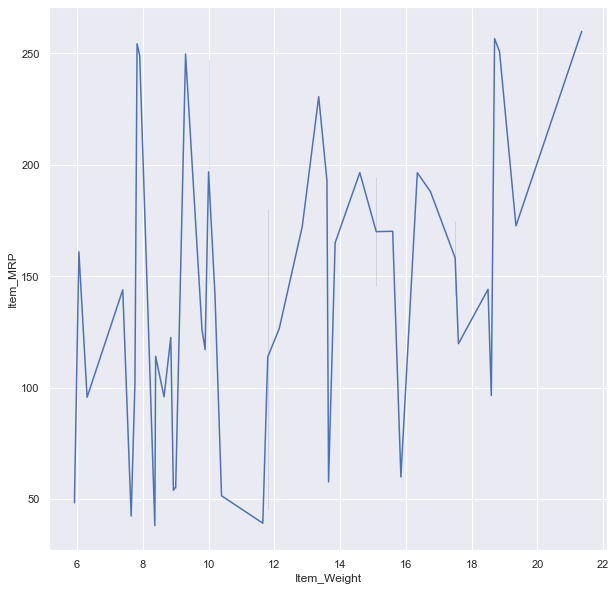

In [5]:
# line plot using relplot
sns.lineplot(x="Item_Weight", y="Item_MRP",data=data_BM[:50]);

#### 막대 그래프 (Bar Chart)

- Seaborn에서는 **barplot** 함수를 사용하여 막대 차트를 만들 수 있습니다.
- matplotlib에서 동일한 것을 달성하기 위해 데이터 범주를 그룹화하기 위해 추가 코드를 작성해야 했습니다.
- 그리고 우리는 플롯이 정확하게 나오는지 확인하기 위해 훨씬 더 많은 코드를 작성해야 했습니다.

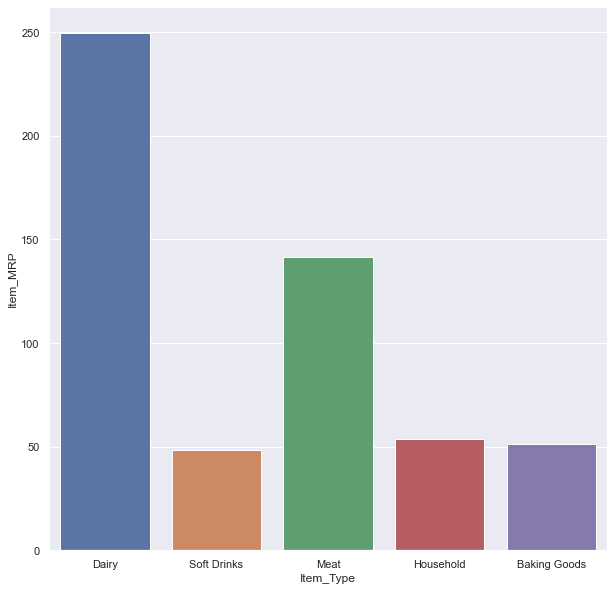

In [6]:
sns.barplot(x="Item_Type", y="Item_MRP", data=data_BM[:5])

#### 히스토그램 (Histogram)

- **distplot()**를 사용하여 Seaborn에 히스토그램을 만들 수 있습니다. 노트북에서 자세히 볼 수 있는 여러 가지 옵션이 있습니다.

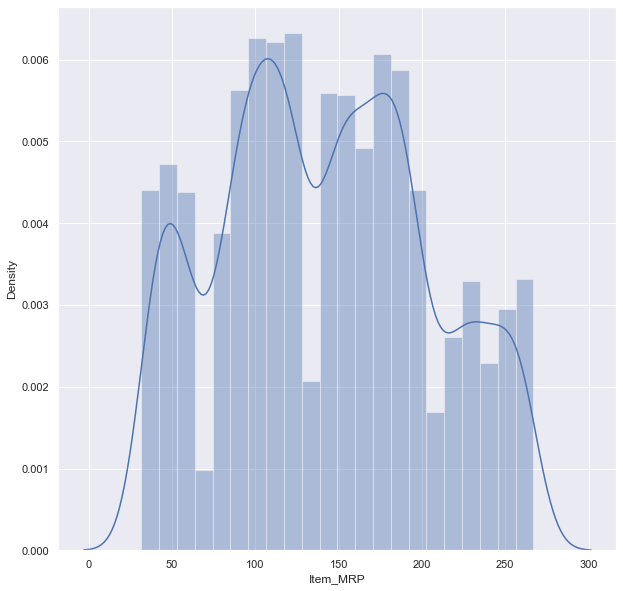

In [7]:
sns.distplot(data_BM['Item_MRP'])

#### 상자 그림 (Box Plot)

- **boxplot()**를 사용하여 Seaborn에서 상자 그림을 만들 수 있습니다.
- Item_의 분포를 시각화해 봅시다.Item_Outlet_Sales of items.

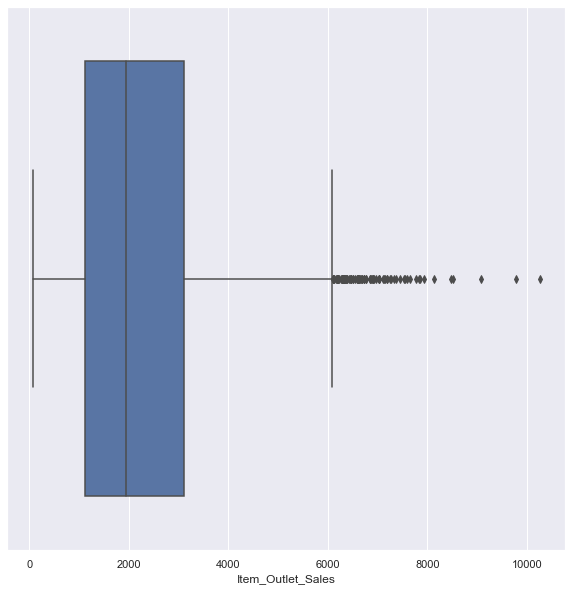

In [8]:
sns.boxplot(data_BM['Item_Outlet_Sales'], orient='vertical') # orient : 플롯의 방향(수직 또는 수평)

#### 바이올린 플롯 (Violin Plot)

- 바이올린 플롯은 박스와 수염 줄거리와 비슷한 역할을 한다. 
- 분포가 비교될 수 있도록 하나 이상의 범주형 변수의 여러 수준에 걸친 정량적 데이터의 분포를 보여 줍니다. 
- 모든 플롯 구성 요소가 실제 데이터 포인트에 대응하는 박스 플롯과는 달리, 바이올린 플롯은 기본 분포의 커널 밀도 추정을 특징으로 한다.
- Seaborn의 **violin 플롯()**을 사용하여 바이올린 플롯을 만들 수 있습니다.

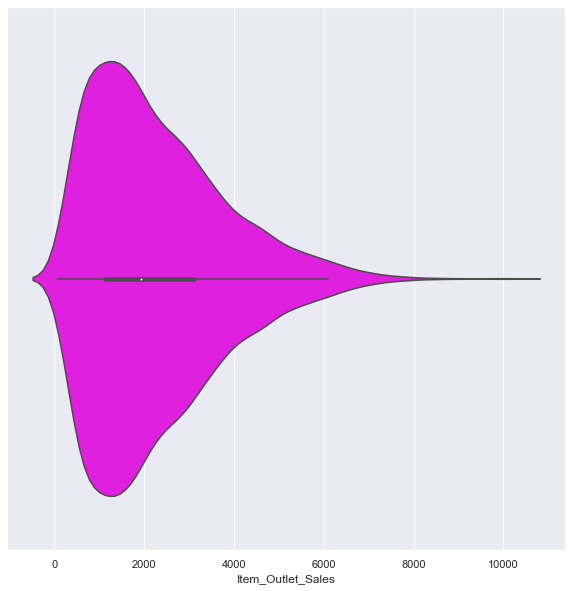

In [9]:
sns.violinplot(data_BM['Item_Outlet_Sales'], orient='vertical', color='magenta')

#### 산점도

* 이것은 점의 구름을 사용하여 두 변수의 분포를 나타내며, 여기서 각 점은 데이터 집합의 관측치를 나타낸다. 
* 이 묘사를 통해 눈은 그들 사이에 의미 있는 관계가 있는지 여부에 대한 상당한 양의 정보를 추론할 수 있다.
- **relplot****을 `kind=contain` 옵션과 함께 사용하여 Seaborn에 산점도를 그릴 수 있습니다.

***참고: 여기서는 그래프에 데이터의 부분 집합만 사용합니다.***

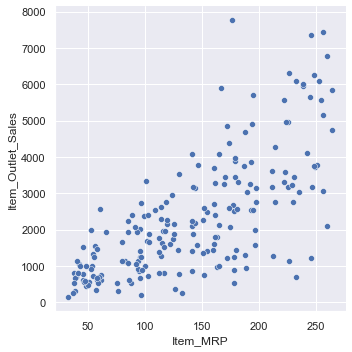

In [9]:
# scatter plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=data_BM[:200], kind="scatter");

#### `hue semantic`

*세 번째 변수에 따라 점을 색칠하여 그림에 다른 차원을 추가할 수도 있습니다. 시본에서는 이를 `hue semantic`을 사용한다고 한다.*

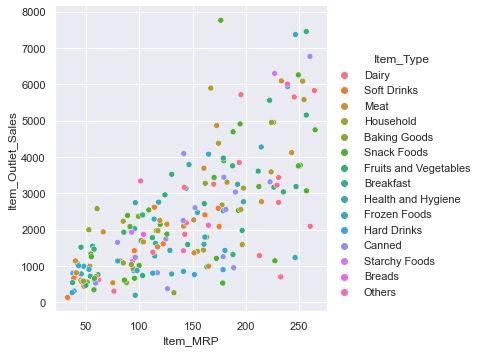

In [10]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Item_Type",data=data_BM[:200]); # hue : 색상

- 이전에 만든 **line chart**를 기억하십니까? **hue** semantic을 사용하면 Seaborn에 더 복잡한 선 그림을 만들 수 있다. 
- 다음 예제에서는 **Outlet_Size**의 서로 다른 범주의 선 그림이 만들어집니다.

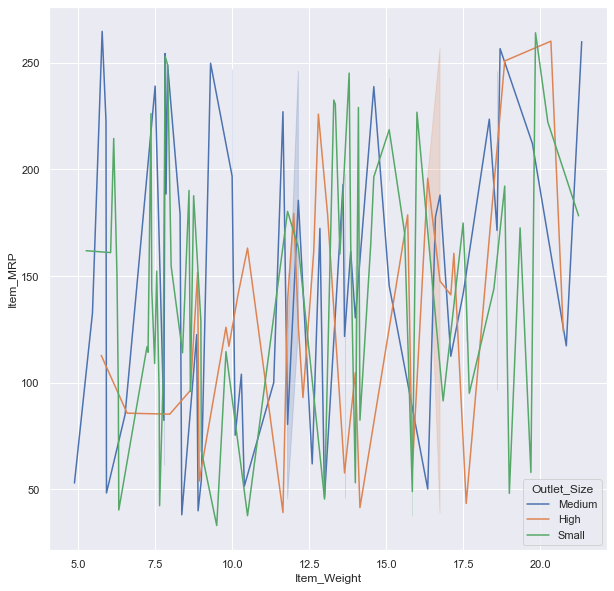

In [11]:
# Outlet_Size의 여러 범주에 대한 여러 선 그림
sns.lineplot(x="Item_Weight", y="Item_MRP",hue='Outlet_Size',data=data_BM[:150]);

#### Bubble plot

- 우리는 Item_Visibility에 따라 거품을 색칠하기 위해 **hue** semantic을 활용하고 동시에 개별 거품의 크기로 사용한다.

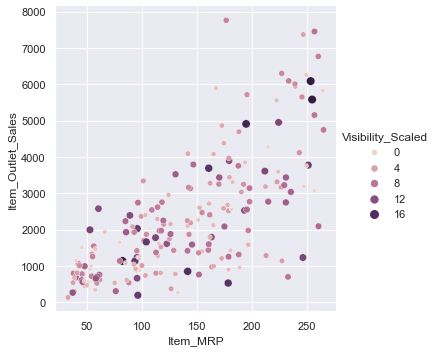

In [12]:
# bubble plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=data_BM[:200], kind="scatter", size="Visibility_Scaled", hue="Visibility_Scaled");

#### 범주별 하위 그림

- 또한 Seaborn에서 **범주에 기반한 그림**을 만들 수 있습니다.
- 각 Outlet_Size에 대한 산점도를 만들었습니다.

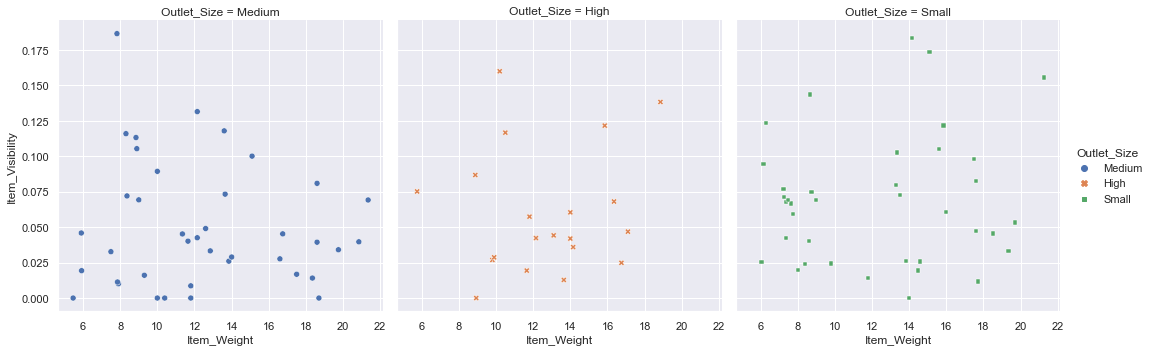

In [13]:
# subplots for each of the category of Outlet_Size
sns.relplot(x="Item_Weight", y="Item_Visibility",hue='Outlet_Size',style='Outlet_Size',col='Outlet_Size',data=data_BM[:100]);

## 2. Advance categorical plots in seaborn

범주형 변수의 경우 Seaborn에는 세 개의 서로 다른 과가 있습니다.

* **Categorical scatterplots:**

 * stripplot() (with kind="strip"; the default)
 * swarmplot() (with kind="swarm")

* **Categorical distribution plots:**

 * boxplot() (with kind="box")
 * violinplot() (with kind="violin")
 * boxenplot() (with kind="boxen")

* **Categorical estimate plots:**

 * pointplot() (with kind="point")
 * barplot() (with kind="bar")

**catplot()의 기본 데이터 표현에서는 산점도를 사용합니다.**

### a. 범주형 산점도

#### 스트립 플롯
- 하나의 변수가 범주형인 산점도를 그립니다.
- 'catplot'에서 **kind=strip**을 전달하여 만들 수 있습니다.

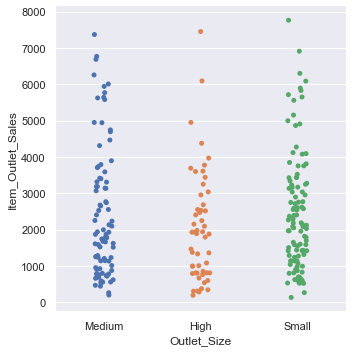

In [10]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='strip',data=data_BM[:250]);

#### 군집도
- 이 함수는 '스트립플롯()과 유사하지만 점이 겹치지 않도록 (범주 축을 따라) 조정됩니다. 
- 이렇게 하면 값 분포가 더 잘 표현되지만 많은 수의 관측치로 확장되지는 않습니다. 이런 식의 줄거리는 때때로 "벌의 따뜻함"이라고 불린다.
- 'catplot'에서 **kind=snot**를 전달하여 만들 수 있습니다.

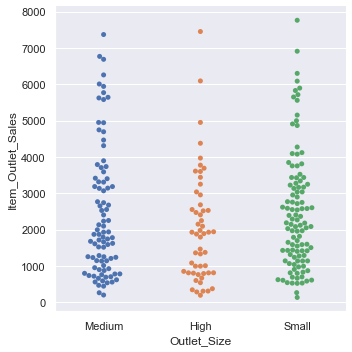

In [11]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='swarm',data=data_BM[:250]);

### b. 범주형 분포도

#### 상자 그림

 * 상자 그림은 분포의 세 사분위수 값과 극단값을 표시합니다. 
 * "whiskers"은 하위 사분위수와 상위 사분위수의 1.5 IQR 내에 있는 점까지 확장되며, 이 범위를 벗어나는 관측치가 독립적으로 표시됩니다. 
 * 즉, 상자 그림의 각 값은 데이터의 실제 관측치에 해당합니다.

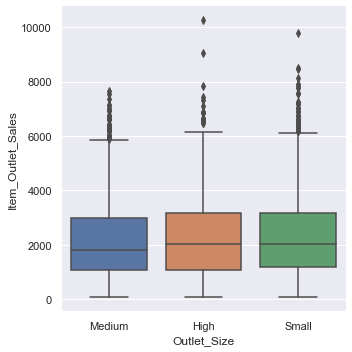

In [12]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="box",data=data_BM);

#### Violin Plots

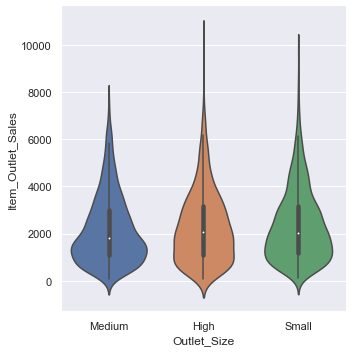

In [13]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="violin",data=data_BM);

#### Boxen plots

- 이 유형의 그림은 "문자 값"으로 정의된 많은 수의 분위수를 표시하기 때문에 원래 "문자 값" 그림으로 명명되었습니다.
- 모든 형상이 실제 관측치에 해당하는 분포의 비모수 표현을 표시하는 상자 그림과 유사합니다.
- 더 많은 분위수를 표시함으로써 분포의 형태, 특히 꼬리에 대한 더 많은 정보를 제공합니다.

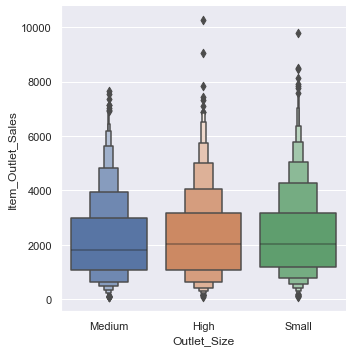

In [14]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="boxen",data=data_BM);

#### Point plot

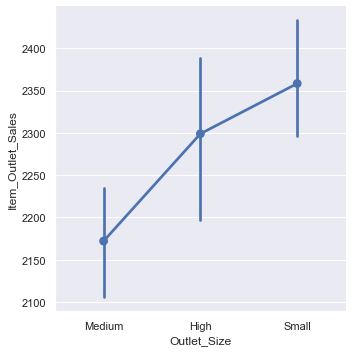

In [15]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="point",data=data_BM);


#### Bar plots

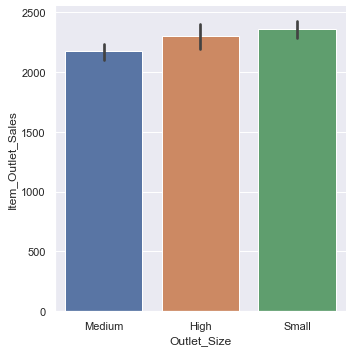

In [16]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="bar",data=data_BM);

## 3. 밀도 그림

***히스토그램 대신, 우리는 Seborn이 sns.kdeplot을 사용하여 수행하는 커널 밀도 추정을 사용하여 분포의 원활한 추정치를 얻을 수 있습니다.***

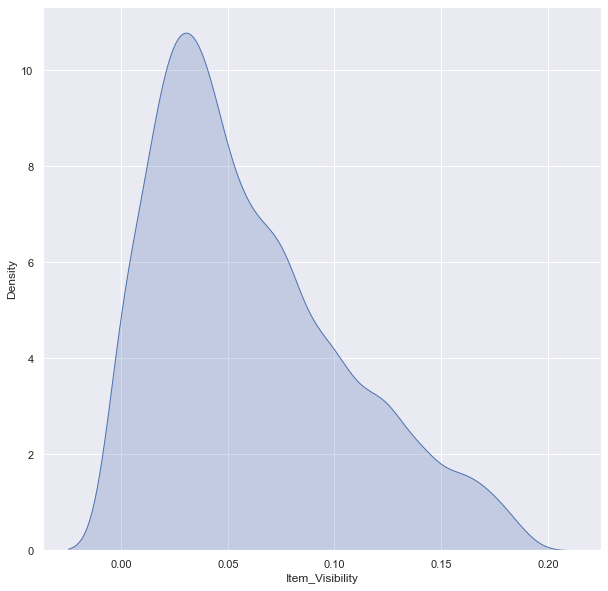

In [17]:
# distribution of Item Visibility
plt.figure(figsize=(10,10))
sns.kdeplot(data_BM['Item_Visibility'], shade=True);

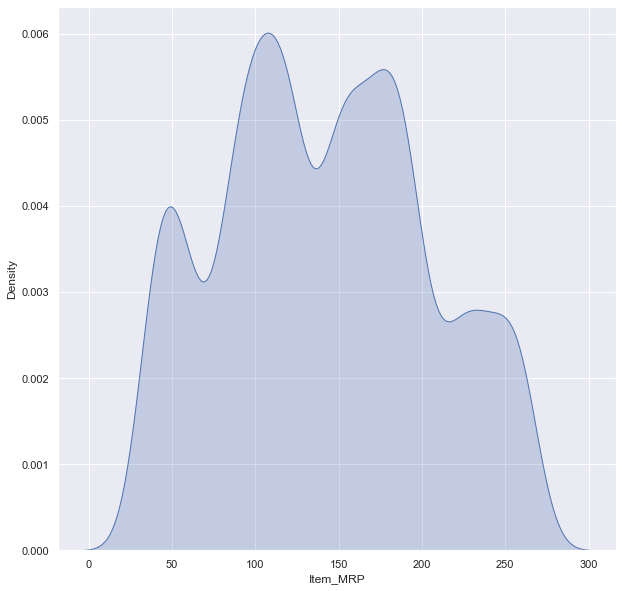

In [18]:
# ITEM MRP 분포
plt.figure(figsize=(10,10))
sns.kdeplot(data_BM['Item_MRP'], shade=True);

### Histogram and Density Plot

***히스토그램과 KDE는 다음과 같이 distplot을 사용하여 결합할 수 있습니다.***

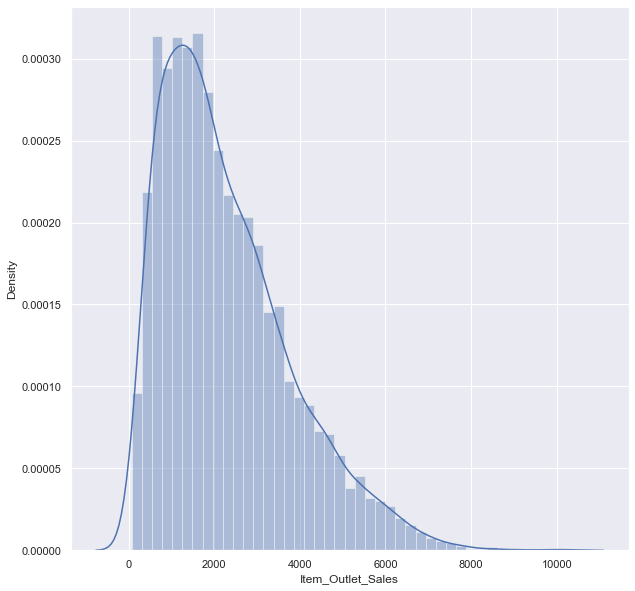

In [19]:
plt.figure(figsize=(10,10))
sns.distplot(data_BM['Item_Outlet_Sales']);

## 4. Pair plots

* 결합 그림을 더 큰 차원의 데이터 집합으로 일반화하면 쌍 그림이 됩니다. 이 기능은 모든 값 쌍을 서로에 대해 표시할 때 다차원 데이터 간의 상관 관계를 탐색하는 데 매우 유용합니다.

* 잘 알려진 iris 데이터 세트를 사용하여 이를 시연할 것입니다. 이 데이터 세 가지 iris 종의 꽃잎과 꽃받침의 측정값을 나열합니다.

In [20]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


***샘플 간의 다차원 관계를 시각화하는 것은 sns.pairplot을 호출하는 것만큼 쉽습니다.***

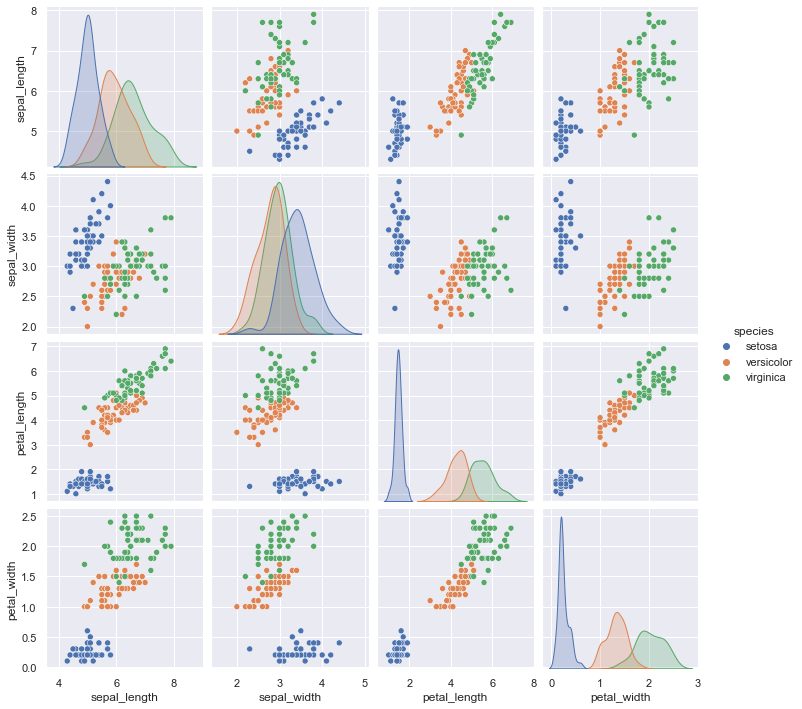

In [21]:
sns.pairplot(iris, hue='species', height=2.5);